# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 5

Do wykonania laboratorium można skorzystać z bibliotek/modułów:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [collections](https://docs.python.org/3/library/collections.html)


### Zadanie 1

Wczytaj plik `english.10MB`
> Podpowiedź: Kodowanie `iso-8859-1`



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
plt.rcParams["figure.figsize"] = (20,10)

with open('english.10MB', 'r', encoding='iso-8859-1') as f:
    data = f.read()


### Zadanie 2
Zamień wszystkie litery na małe.


In [2]:
data_lower = data.lower()

### Zadanie 3
Znajdź unikalne litery (pomiń inne znaki) w tekście i dla każdej przypisz liczbę wystąpień, a następnie wyświetl histogram.

Pytanie: Jaka litera występuje najczęściej?

> Podpowiedź: `import string`


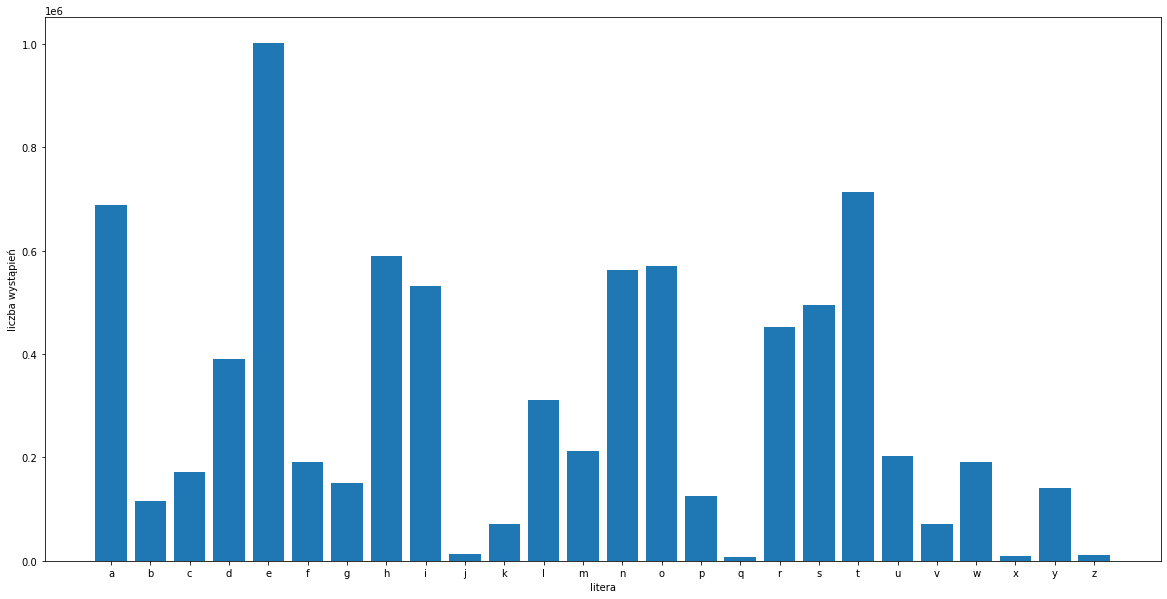

In [3]:
import string
uni = sorted(list(set(data_lower)))
uni_l = {}
for c in uni:
    if c in string.ascii_letters:
        uni_l[c] = data_lower.count(c)
plt.bar([c for c in uni_l.keys()], list(uni_l.values()))
plt.xlabel('litera')
plt.ylabel('liczba wystąpień')
plt.show()

### Zadanie 4

Napisz funkcję, która dla podanego prefiksu (ciąg liter, np. `th` to prefiks o długości 2) zwróci listę maksymalnie pięciu liter, które mają największe prawdopodobieństwo wystąpienia po nim.

```python
In : nast('th', s) # th - prefiks, s - tekst
Out: ['e', 'a', 'i', 'o', 'y']
```



In [4]:
import re
import collections

def nast(pref, s):
    found = [m.end() for m in re.finditer(pref, s)]
    occ = collections.Counter([s[i] for i in found if s[i] in string.ascii_lowercase])
    temp = sorted(occ.items(), key=lambda item: item[1], reverse=True)[:5]
    return [t[0] for t in temp]

nast('th', data_lower)

['e', 'a', 'i', 'o', 'y']

### Zadanie 5

Napisz kod, który wczytuje kolejne znaki od użytkownika i podpowiada następne możliwe litery (maksymalnie pięć). Wykorzystaj funkcję zaimplementowaną w poprzednim zadaniu.

> Podpowiedź: Możesz wykorzystać funkcję `input()` do wczytywania znaków.

Przykład działania:
```
Nacisnij <ENTER> aby zakonczyc.
Podaj litere: f
Podaj kolejną literę (możliwe: ['o', 'a', 'r', 'e', 'i']): fo
Podaj kolejną literę (możliwe: ['r', 'u', 'l', 'o', 'x']): for
Podaj kolejną literę (możliwe: ['e', 't', 'm', 'g', 'c']): fore
Podaj kolejną literę (możliwe: ['s', 'h', 'i', 'g', 'v']): fores
Podaj kolejną literę (możliwe: ['t', 'a', 'e', 'i', 'k']): forest
Podaj kolejną literę (możliwe: ['s', 'a']): forests
```

In [10]:
c = input("Podaj litere")
text = c
possible = nast(text, data_lower)
while c != '' and possible:
    c = input(f'Podaj kolejną literę (możliwe: {possible}): {text}')
    text += c
    possible = nast(text, data_lower)

print(text)

father


### Zadanie 6

Wykonaj zadanie podobne do zad. 6, ale na poziomie słów. Dla ułatwienia słowa można wybierać z listy za pomocą liczb 1-5.

In [20]:
def nast_slowo(slowo, s):
    found = [m for m in re.findall(f'{slowo} \w+', s)]
    occ = collections.Counter(found)
    temp = sorted(occ.items(), key=lambda item: item[1], reverse=True)[:5]
    return [t[0] for t in temp]
# nast_slowo('they', data_lower)

In [26]:
c = input("Podaj slowo")
text = c
possible = nast_slowo(text, data_lower)
while c != '' and possible:
    choices = [words.split(" ")[-1] for words in possible]
    c = input(f'Podaj kolejną literę (możliwe: {choices}): {text}')
    try:
        choice = int(c)
        text += ' ' + choices[choice-1]
    except ValueError:
        text += ' ' + c
    except IndexError:
        print('Indeks poza dostepnym zakresem')

    possible = nast_slowo(text, data_lower)
print(text)

they were in the midst of the iraki
